In [0]:
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_labels = pd.read_csv('/content/drive/My Drive/Thinkful Data Science/LIDC/candidates_train.csv')
test_labels = pd.read_csv('/content/drive/My Drive/Thinkful Data Science/LIDC/candidates_test.csv')
validation_labels = pd.read_csv('/content/drive/My Drive/Thinkful Data Science/LIDC/candidates_validation.csv')

In [0]:
train_path = '/content/drive/My Drive/Thinkful Data Science/LIDC/Train/'
test_path = '/content/drive/My Drive/Thinkful Data Science/LIDC/Test/'
validation_path = '/content/drive/My Drive/Thinkful Data Science/LIDC/Validation/'

In [0]:
train_df = pd.DataFrame({'x_col': os.listdir(train_path)})

test_df = pd.DataFrame({'x_col': os.listdir(test_path)})

validation_df = pd.DataFrame({'x_col': os.listdir(validation_path)})

In [0]:
# Now we need to structure dataframes for the flow_from_dataframe keras method, 'nodule' is a binary classification, 1 = nodule, 0 = no nodule 

for i,img in enumerate(train_df.x_col):
    img_cat = img[0:3]
    img_id = int(''.join([n for n in img if n.isdigit()]))            

    if img_cat == 'pos':
      train_df.loc[i, 'nodule'] = 'yes'                            

    else:
      train_df.loc[i, 'nodule'] = 'no'
          
      
for i,img in enumerate(test_df.x_col):
    img_cat = img[0:3]
    img_id = int(''.join([n for n in img if n.isdigit()]))            

    if img_cat == 'pos':
      test_df.loc[i, 'nodule'] = 'yes'                            

    else:
      test_df.loc[i, 'nodule'] = 'no'
      
for i,img in enumerate(validation_df.x_col):
    img_cat = img[0:3]
    img_id = int(''.join([n for n in img if n.isdigit()]))            

    if img_cat == 'pos':
      validation_df.loc[i, 'nodule'] = 'yes'                            

    else:
      validation_df.loc[i, 'nodule'] = 'no' 
      
  

In [0]:
train_batches = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest').flow_from_dataframe(dataframe=train_df,
                                                         x_col='x_col',
                                                         y_col='nodule',
                                                         directory=train_path,
                                                         target_size=(150,150),
                                                         class_mode='binary',
                                                         batch_size=10)

test_batches = ImageDataGenerator(rescale=1/255).flow_from_dataframe(dataframe=test_df,
                                                         x_col='x_col',
                                                         y_col='nodule',
                                                         directory=test_path,
                                                         target_size=(150,150),
                                                         batch_size=10)

validation_batches = ImageDataGenerator(rescale=1/255).flow_from_dataframe(dataframe=validation_df,
                                                         x_col='x_col',
                                                         y_col='nodule',
                                                         directory=validation_path,
                                                         target_size=(150,150),
                                                         class_mode='binary',
                                                         batch_size=10)

Found 1495 validated image filenames belonging to 2 classes.
Found 173 validated image filenames belonging to 2 classes.
Found 412 validated image filenames belonging to 2 classes.


In [0]:
imgs, labels = next(train_batches)

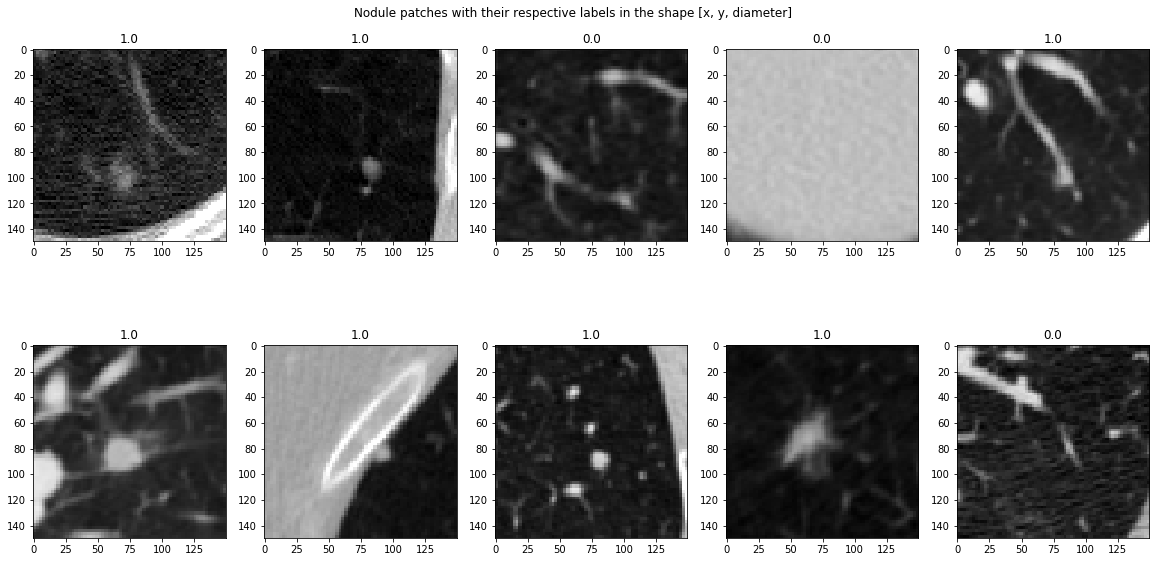

In [0]:
plt.figure(figsize=(20,10))
plt.suptitle('Nodule patches with their respective labels in the shape [x, y, diameter]', y=0.9)

for i, img in enumerate(imgs[0:10]):
  plt.subplot(2,5,i+1)
  plt.imshow(img)
  plt.title(labels[i])
  
plt.show()

In [0]:
NAME = 'VGG16_classification_with_DA'

VGG16 = keras.applications.vgg16.VGG16(include_top=False, input_shape=(150,150,3))





58892288/58889256 [==============================] - 1s 0us/step








In [0]:
model = Sequential()

for layer in VGG16.layers[:-1]:
  model.add(layer)

In [0]:
# Lets freeze all the layers that we have now and add a new dense output layer

for layer in model.layers:
  layer.trainable = False
  
  
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)      

In [0]:
model.compile(Adam(lr=.0001), loss='binary_crossentropy', metrics=['accuracy'])

log_dir=f"/content/drive/My Drive/Thinkful Data Science/LIDC/logs/fit/{NAME}"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)

model_dir=f"/content/drive/My Drive/Thinkful Data Science/LIDC/logs/models/{NAME}.hdf5"
model_ckpt = keras.callbacks.ModelCheckpoint(filepath=model_dir, 
                                          monitor='val_acc', 
                                          verbose=0, 
                                          save_best_only=True, 
                                          save_weights_only=False, 
                                          mode='auto', 
                                          period=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit_generator(train_batches, 
                    steps_per_epoch=1000,
                    validation_data=validation_batches, 
                    validation_steps=41, epochs=500, 
                    verbose=2,
                   callbacks=[tensorboard_callback, model_ckpt])



Epoch 1/500


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.237192). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.236366). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.118249). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 - 596s - loss: 0.5972 - acc: 0.6777 - val_loss: 0.4918 - val_acc: 0.7780
Epoch 2/500
 - 120s - loss: 0.5399 - acc: 0.7331 - val_loss: 0.4805 - val_acc: 0.7587
Epoch 3/500
 - 118s - loss: 0.5110 - acc: 0.7518 - val_loss: 0.4666 - val_acc: 0.7761
Epoch 4/500
 - 118s - loss: 0.4934 - acc: 0.7677 - val_loss: 0.4547 - val_acc: 0.7910
Epoch 5/500
 - 118s - loss: 0.4888 - acc: 0.7710 - val_loss: 0.5051 - val_acc: 0.7662
Epoch 6/500
 - 118s - loss: 0.4733 - acc: 0.7802 - val_loss: 0.4720 - val_acc: 0.7861
Epoch 7/500
 - 118s - loss: 0.4563 - acc: 0.7851 - val_loss: 0.4796 - val_acc: 0.7562
Epoch 8/500
 - 118s - loss: 0.4579 - acc: 0.7850 - val_loss: 0.4801 - val_acc: 0.7736
Epoch 9/500
 - 118s - loss: 0.4491 - acc: 0.7874 - val_loss: 0.5471 - val_acc: 0.7562
Epoch 10/500
 - 119s - loss: 0.4351 - acc: 0.8002 - val_loss: 0.4301 - val_acc: 0.8134
Epoch 11/500
 - 119s - loss: 0.4195 - acc: 0.8112 - val_loss: 0.5688 - val_acc: 0.7413
Epoch 12/500
 - 119s - loss: 0.4209 - acc: 0.8113 - val_loss: 0.

KeyboardInterrupt: ignored